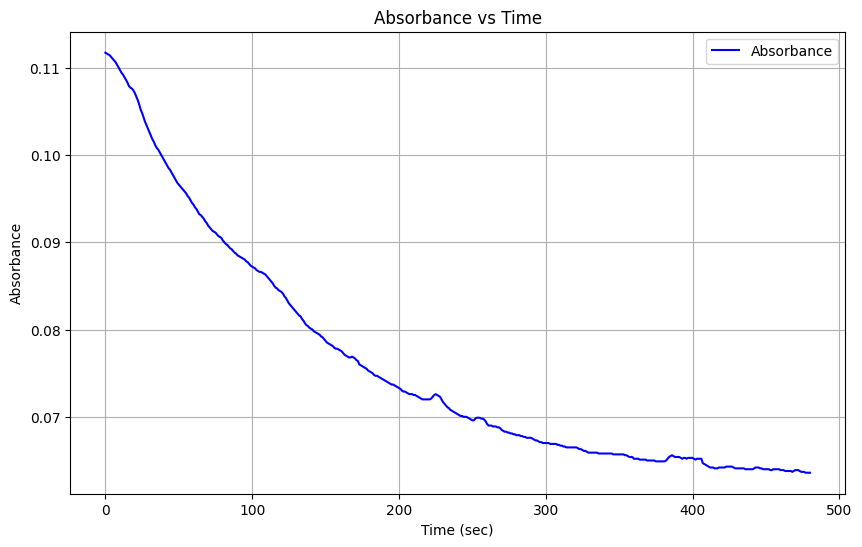

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из файла
file_path = 'Z22.csv'
data = pd.read_csv(file_path, skiprows=1)  # Пропускаем первую строку с метаданными

# Извлечение данных
time = data['Time/sec']
abs_value = data['Abs']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(time, abs_value, label='Absorbance', color='blue')
plt.xlabel('Time (sec)')
plt.ylabel('Absorbance')
plt.title('Absorbance vs Time')
plt.grid(True)
plt.legend()
plt.show()

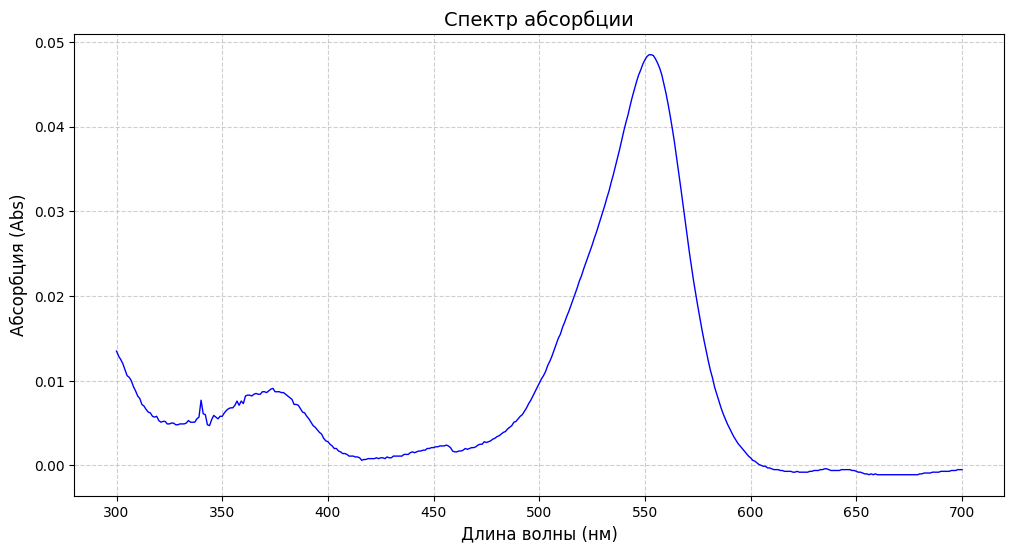

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('ZSPEC.csv', skiprows=1)

# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(data['WL/nm'], data['Abs'], color='blue', linewidth=1)
plt.xlabel('Длина волны (нм)', fontsize=12)
plt.ylabel('Абсорбция (Abs)', fontsize=12)
plt.title('Спектр абсорбции', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

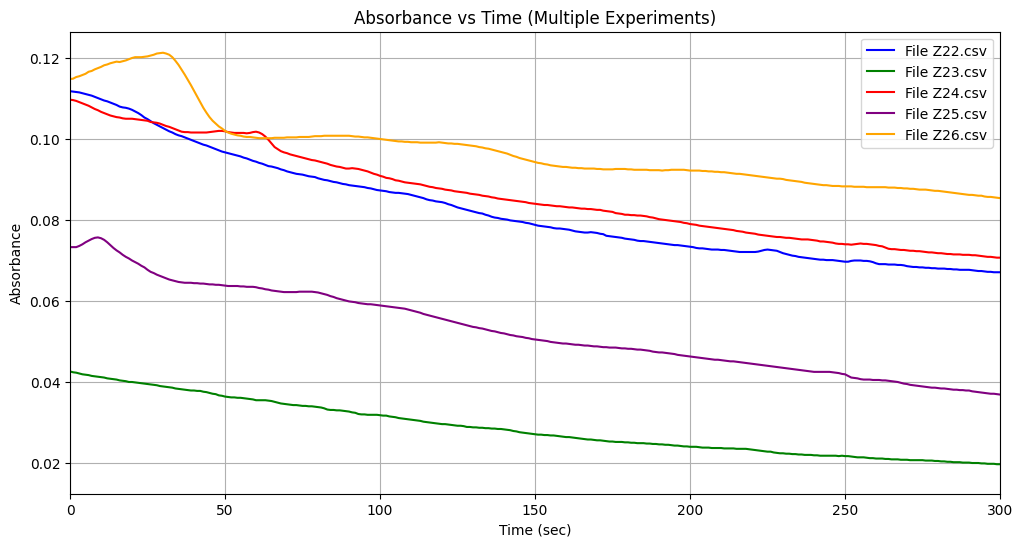

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Список файлов для анализа (можно задать вручную или через glob)
file_names = ['Z22.csv', 'Z23.csv', 'Z24.csv', 'Z25.csv', 'Z26.csv']  # или glob.glob('Z*.csv')

# Настройка графика
plt.figure(figsize=(12, 6))
plt.xlabel('Time (sec)')
plt.ylabel('Absorbance')
plt.title('Absorbance vs Time (Multiple Experiments)')
plt.grid(True)

# Цвета для разных кривых
colors = ['blue', 'green', 'red', 'purple', 'orange']
t_max = 300
# Чтение и построение данных для каждого файла
for i, file in enumerate(file_names):
    try:
        data = pd.read_csv(file, skiprows=1)  # Пропускаем строку с метаданными
        time = data['Time/sec']
        abs_value = data['Abs']
        plt.plot(time, abs_value, label=f'File {file}', color=colors[i % len(colors)])
        
    except Exception as e:
        print(f"Ошибка при чтении файла {file}: {e}")

plt.legend()
plt.xlim(0, t_max)
plt.show()

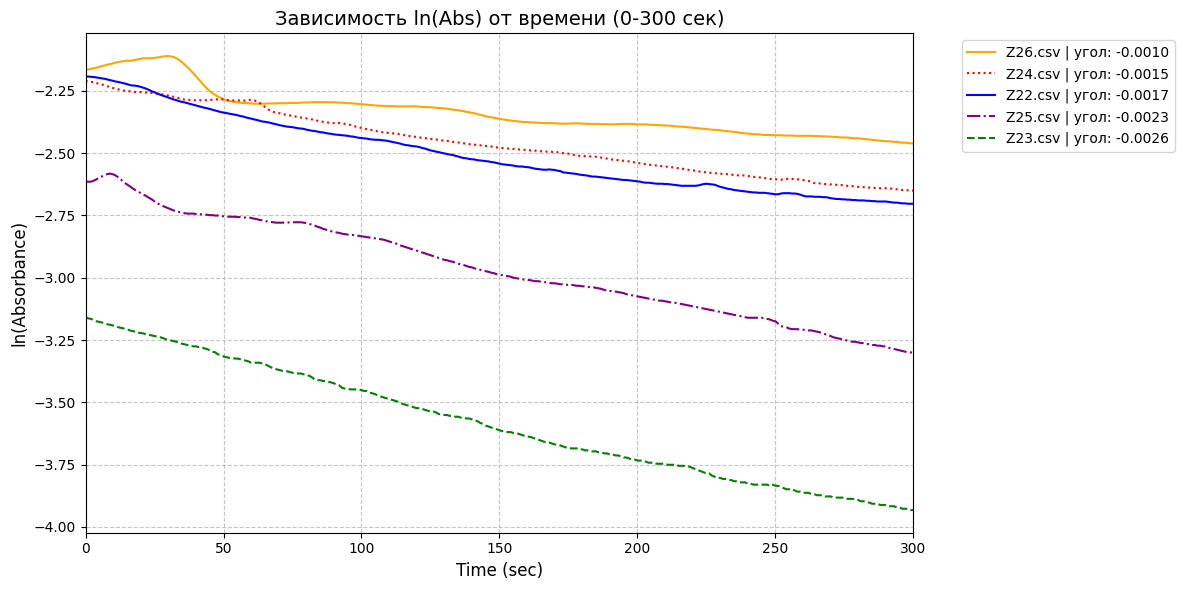

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Настройка списка файлов
file_names = ['Z22.csv', 'Z23.csv', 'Z24.csv', 'Z25.csv', 'Z26.csv']  

# Создание графика
plt.figure(figsize=(12, 6))
plt.xlabel('Time (sec)', fontsize=12)
plt.ylabel('ln(Absorbance)', fontsize=12)
plt.title('Зависимость ln(Abs) от времени (0-300 сек)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Цвета и стили линий
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['-', '--', ':', '-.', '-']

# Максимальное время (300 сек)
t_max = 300

# Создаем список для хранения данных о графиках и углах наклона
plot_data = []

# Построение данных для каждого файла
for i, file in enumerate(file_names):
    try:
        data = pd.read_csv(file, skiprows=1)
        time = data['Time/sec']
        abs_value = data['Abs']
        
        # Обрезаем данные до 300 секунд
        mask = time <= t_max
        time = time[mask]
        abs_value = abs_value[mask]
        
        # Вычисляем натуральный логарифм (защита от нулевых значений)
        abs_value_clipped = abs_value.clip(lower=1e-10)
        ln_abs = np.log(abs_value_clipped)
        
        # Линейная регрессия для расчёта угла наклона
        slope, intercept, r_value, p_value, std_err = linregress(time, ln_abs)
        angle = np.arctan(slope)  # Угол в радианах
        
        # Сохраняем данные для последующей сортировки
        plot_data.append({
            'file': file,
            'time': time,
            'ln_abs': ln_abs,
            'angle': angle,
            'color': colors[i % len(colors)],
            'linestyle': linestyles[i % len(linestyles)]
        })
        
    except Exception as e:
        print(f"Ошибка при чтении файла {file}: {e}")

# Сортируем данные по углу наклона
plot_data.sort(key=lambda x: x['angle'], reverse=True)

# Построение графиков в отсортированном порядке
for data in plot_data:
    plt.plot(data['time'], data['ln_abs'],
            label=f"{data['file']} | угол: {data['angle']:.4f}",
            color=data['color'],
            linestyle=data['linestyle'],
            linewidth=1.5)

# Настройка легенды и отображение
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, t_max)
plt.tight_layout()
plt.show()

Параметры линейной регрессии:
Наклон: 0.0034 ± 0.0042
Пересечение: 0.0013
Коэффициент детерминации R²: 0.1748


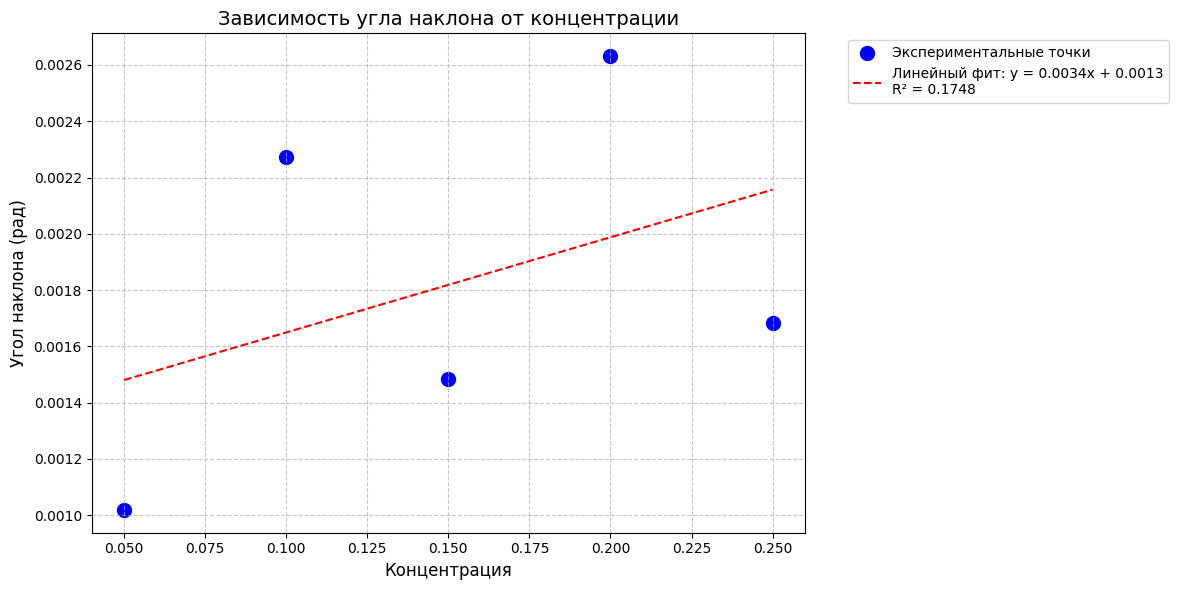

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Настройка списка файлов и соответствующих концентраций
file_names = ['Z22.csv', 'Z23.csv', 'Z24.csv', 'Z25.csv', 'Z26.csv']
concentrations = [0.05, 0.1, 0.15, 0.2, 0.25]  # Убрал reverse()
concentrations.reverse()
# Создаем списки для хранения углов наклона
angles = []
t_max = 300  # Максимальное время (300 сек)

# Обработка данных для каждого файла
for i, file in enumerate(file_names):
    try:
        data = pd.read_csv(file, skiprows=1)
        time = data['Time/sec']
        abs_value = data['Abs']
        
        # Обрезаем данные до 300 секунд
        mask = time <= t_max
        time = time[mask]
        abs_value = abs_value[mask]
        
        # Вычисляем натуральный логарифм
        abs_value_clipped = abs_value.clip(lower=1e-10)
        ln_abs = np.log(abs_value_clipped)
        
        # Линейная регрессия
        slope, intercept, r_value, p_value, std_err = linregress(time, ln_abs)
        angle = np.arctan(slope)  # Угол в радианах
        angles.append(-angle)  # Берем отрицательный угол
        
    except Exception as e:
        print(f"Ошибка при чтении файла {file}: {e}")
        angles.append(np.nan)

# Удаляем пары с NaN значениями
valid_data = [(c, a) for c, a in zip(concentrations, angles) if not np.isnan(a)]
concentrations_clean = [x[0] for x in valid_data]
angles_clean = [x[1] for x in valid_data]

# Создаем график
plt.figure(figsize=(12, 6))

# График зависимости углов от концентраций
plt.scatter(concentrations_clean, angles_clean, color='blue', s=100, label='Экспериментальные точки')
plt.xlabel('Концентрация', fontsize=12)
plt.ylabel('Угол наклона (рад)', fontsize=12)
plt.title('Зависимость угла наклона от концентрации', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Линейная аппроксимация (только если есть данные)
if len(angles_clean) >= 2:
    slope, intercept, r_value, p_value, std_err = linregress(concentrations_clean, angles_clean)
    x_fit = np.linspace(min(concentrations_clean), max(concentrations_clean), 100)
    y_fit = intercept + slope * x_fit
    
    plt.plot(x_fit, y_fit, 'r--', 
             label=f'Линейный фит: y = {slope:.4f}x + {intercept:.4f}\nR² = {r_value**2:.4f}')
    
    # Выводим параметры фита в консоль
    print(f"Параметры линейной регрессии:")
    print(f"Наклон: {slope:.4f} ± {std_err:.4f}")
    print(f"Пересечение: {intercept:.4f}")
    print(f"Коэффициент детерминации R²: {r_value**2:.4f}")

plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()